# MSE 446 Project
## car-price-prediction-ml
## Group Members: Kiyon Farokhi and Eunchan Koh

### Revised Problem Statement
Accurately determining a fair price for a car can be challenging for both individuals and dealerships. Consumers who lack in-depth pricing knowledge risk overpaying or falling victim to scams, while dealerships may inadvertently overvalue or undervalue their inventory. To address this issue, we propose developing a machine learning model that forecasts the fair market price of a car using comprehensive data from a wholesale car dealer website. This model will consider a wide range of factors—including brand, model, production year, mileage, accident history, and additional features—to generate reliable price estimates. Ultimately, the model’s predictions aim to help both consumers and dealerships make more informed decisions about buying or selling vehicles.

Machine learning offers a more robust and flexible approach to car price prediction because it can capture the complex interactions and non-linear relationships among a broad set of variables. Unlike traditional pricing models, which typically rely on a small number of features or strict linear assumptions, machine learning models adapt to market changes over time by integrating new data into their training process. This adaptability is especially important in a market subject to evolving consumer preferences, economic conditions, and seasonal trends. Furthermore, machine learning methods can incorporate a richer variety of inputs—including structured data like vehicle mileage and brand, as well as unstructured data such as text descriptions or vehicle history reports—leading to more accurate and insightful price forecasts. By continuously learning from new information and uncovering hidden patterns that conventional models might overlook, a machine learning–based pricing system can provide more reliable and up-to-date valuation guidance.
**Hypothesis:** Incorporating time-based features (e.g., incremental mileage, adjusted depreciation for future years) into a tree-based ensemble model (e.g., Random Forest) will reduce the Root Mean Squared Error (RMSE) of 1–3 year car resale price predictions by at least 20% compared to a baseline linear regression model.


### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')


### Implementing Multiple Linear Regression with new_cars/data.csv 

In [5]:
# get new car dataset
df_new_cars = pd.read_csv('./data/new_cars/data.csv')

# inspecting the data
display(df_new_cars.head(10))
display(df_new_cars.info())
display(df_new_cars.describe())


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

None

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


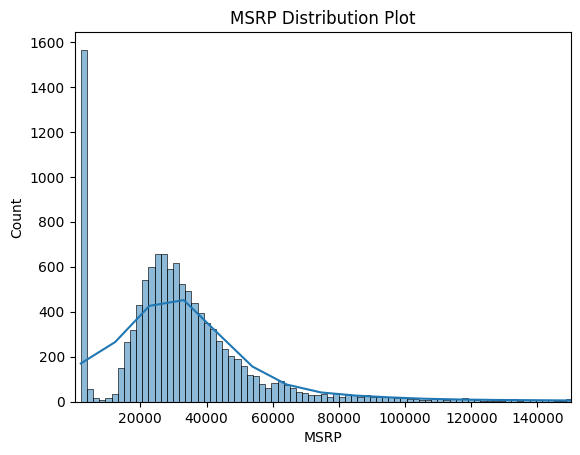

In [6]:
# Data Distribution
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)
plt.title('MSRP Distribution Plot')
plt.xlim(left=100, right= 150000)
sns.histplot(df_new_cars['MSRP'], kde=True)
plt.show()


## Distribution Plot Analysis for MSRP 
**I set the limit on x to 200000 since majority of cars fall into this range, so the plot can be more accruately read**

Looking at the above distribution plot, we can see that a most cars fall in the MSRP range of 15000 - 60000

In [7]:
# dataset has city and highway mpg, want to find the average
def calculate_combined_mpg(city, highway):
    # EPA: assuming 55% city driving, 45% highway driving
    combined_mpg = 1/((0.55 / city) + (0.45 /highway))
    return combined_mpg

def scatter_plt(x,y):
    plt.scatter(x,y)
    plt.box(False)
    plt.show()

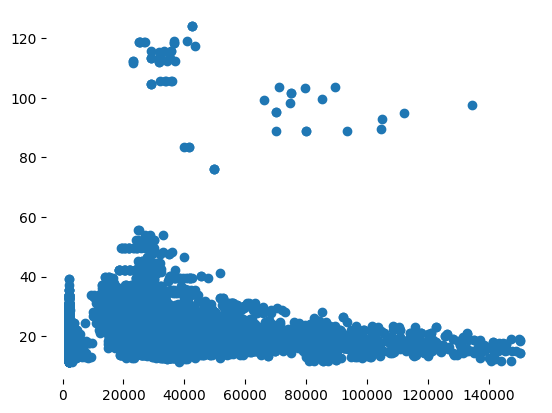

In [8]:
# Cleaning data, removing cars with value over 1500000
df_new_cars = df_new_cars[df_new_cars['MSRP'] <= 150000]
# Checking the relationship between mpg and msrp
df_new_cars['combined_mpg'] = 1 / ((0.55 / df_new_cars['city mpg']) + (0.45 / df_new_cars['highway MPG']))

scatter_plt(df_new_cars['MSRP'], df_new_cars['combined_mpg'])



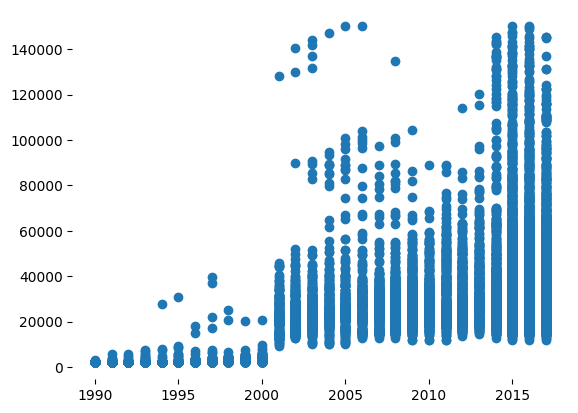

In [9]:
# Relationship between year and price
scatter_plt(df_new_cars['Year'], df_new_cars['MSRP'])

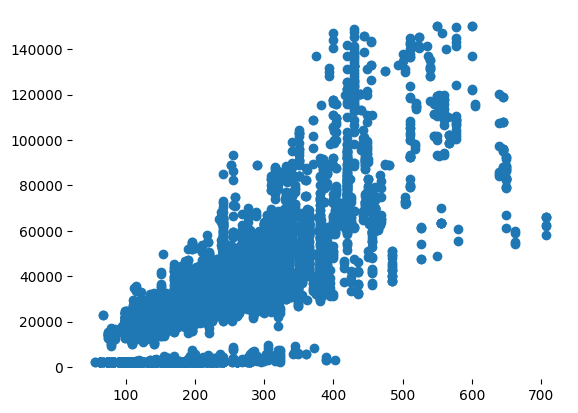

In [10]:
# relationship between engine HP and price
scatter_plt(df_new_cars['Engine HP'], df_new_cars['MSRP'])

In [11]:
# For creating One-Hot-encoding for categories and to scaling the values
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

ct = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [0,1,2,3,4])
        # ('cat', categorical_transformer, [0,2,4])
    ], remainder='passthrough'
)

In [12]:
#function to erase white space if the input is string. Then returns the character without white spaces.
def strip_if_str(x):
    return x.strip() if isinstance(x,str) else x

In [19]:
# let X be the variables and Y be the price output. Then also adding columns for one-hot-encoding.
X =  df_new_cars.iloc[:, [i for i in range(df_new_cars.shape[1]) if i != 15]]
X = pd.get_dummies(X, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],dtype=int) 

#save the column names using this
column_names = X.columns.to_numpy()

# Since price is on the last column, we can get the price column by following
y = df_new_cars.iloc[:, 15]
print(df_new_cars)

# Handle missing values or convert them as needed
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].fillna('Unknown')

# Fill Numeric columns NANs with the mean
for col in X.select_dtypes(include=[np.number]).columns:
    X[col] = X[col].fillna(X[col].mean())

# Strip whitespace in string columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].str.strip()

#And using this, change the df so hot-encoding for categories and standard scaling is applied to X
X = ct.fit_transform(X)


          Make       Model  Year                Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors                        Market Category Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  combined_mpg
0          BMW  1 Series M  2011     premium unleaded (required)      335.0               6.0            MANUAL   rear wheel drive              2.0  Factory Tuner,Luxury,High-Performance      Compact          Coupe           26        19        3916  46135     21.619256
1          BMW    1 Series  2011     premium unleaded (required)      300.0               6.0            MANUAL   rear wheel drive              2.0                     Luxury,Performance      Compact    Convertible           28        19        3916  40650     22.212944
2          BMW    1 Series  2011     premium unleaded (required)      300.0               6.0            MANUAL   rear wheel drive              2.0                Luxury,High-Performance 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

np.set_printoptions(precision = 2)
result = np.column_stack([y_pred, y_test])

#so we got this result. Left values are the predicted values, and the values on the right are the actual values on test data.
print(result)

[[ 1598.19  2000.  ]
 [62325.04 65800.  ]
 [19856.59 18690.  ]
 ...
 [33796.71 32700.  ]
 [28887.81 31695.  ]
 [40985.27 39380.  ]]


In [24]:
#as the output, we got the coefficients and intercept values as following
temp1 = regressor.coef_

temp = np.vstack((column_names, temp1))
print(temp)
# print(f'Coefficient: {regressor.coef_}')

print(f'Intercept: {regressor.intercept_}')

[['Year' 'Engine HP' 'Engine Cylinders' ...
  'Vehicle Style_Regular Cab Pickup' 'Vehicle Style_Sedan'
  'Vehicle Style_Wagon']
 [4583.010106006958 7406.268806294249 -704.9591490774869 ...
  -604.8109288745418 -3752.9569811757174 -3416.438648088615]]
Intercept: 34857.070198071284


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
result = np.column_stack([y_pred, y_test])
sumUp = 0
for i in range(result.shape[0]):
    calValue = result[i][0] - result[i][1]
    calValue *= calValue
    sumUp += calValue
    
sumUp /= result.shape[0]
sumUp = math.sqrt(sumUp)

print("baseline's RMSE is:", sumUp)

baseline's RMSE is: 4577.866771742283


In [22]:
# same as the work above, but to make sure this function is also reliable
rmse = root_mean_squared_error(y_test, y_pred) # RMSE
print("RMSE of baseline is: ", rmse)

RMSE of baseline is:  4345.048460867949


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# this function will be creating 100 decision trees. Each tree does not have limit on the depth, and each leaf can be having at least only one sample.
# All trees consider all features at most. It uses bootstrapping for creating the trees, and it does not have any seed number for randomness.
# However, if the random seed number need to be used, include random_state=0 or 42.
# By default, Each tree has same number of the sample as the size of randomly selected 80% training data at most.
# To modify, we can change the maximum number of samples in each tree using max_sample=n.
# currently, using the sample size equal to 80% of the training dataset.
sampleSize = int(X_train.shape[0]*0.8)
print("Sample Size is: ", sampleSize)
rf = RandomForestRegressor(n_estimators=100, max_samples=sampleSize)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred) # RMSE
print("RMSE of random forest regression is: ", rmse)

Sample Size is:  7361
RMSE of random forest regression is:  3514.7548469051094
